### The Sparks Foundation -GRIPSeptember21

Task 2 : Prediction using unsupervised ML

Problem Statement: Predict the optimum number of clusters and represent it visually.

BY: ANEENA ANN SUNIL

###  Importing the data

In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Reading and downloading the data
iris_df=pd.read_csv('Iris.csv')

In [3]:
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_df.shape

(150, 6)

### Data Visualisation 

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
input_cols=list(iris_df.iloc[:,1:5])


In [10]:
x=iris_df[input_cols]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
target=['Species']
target

['Species']

In [12]:
x.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

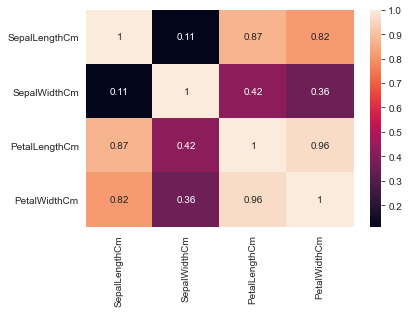

In [13]:
sns.heatmap(abs(x.corr()),annot=True)

From the heatmap we can see that the correlation between PetalLengthCm and SepalLengthCm is 0.87

# K Means Clustering

Ploting Elbow Graph

In [14]:
from sklearn.cluster import KMeans

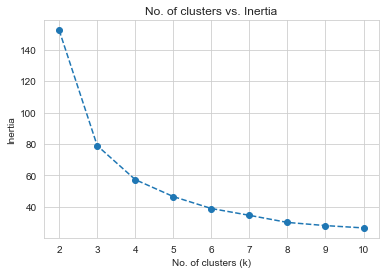

In [15]:
options=range(2,11)
inertias=[]


for n_clusters in options:
    model=KMeans(n_clusters, random_state=42).fit(x)
    inertias.append(model.inertia_)

plt.title('No. of clusters vs. Inertia')
plt.plot(options, inertias, '--o')
plt.xlabel('No. of clusters (k)')
plt.ylabel('Inertia');

The elbow chart is plotted and the number of clusters beyond which the reduction in interia decresase sharply is chosen. In this case '3' no. of clusters.

In [16]:
model=KMeans(n_clusters=3, random_state=42)

In [17]:
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [18]:
#Checking the cluster centers for each cluster
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [19]:
model.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
iris_df['cluster']=model.labels_
iris_df['cluster']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: cluster, Length: 150, dtype: int32

In [21]:
display(iris_df['cluster'].value_counts(), iris_df['Species'].value_counts())

0    62
1    50
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

We can see that Iris-setosa is predicted accurately by the model.There are a few variation in the prediction of Iris-versicolor and Iris-setosa.

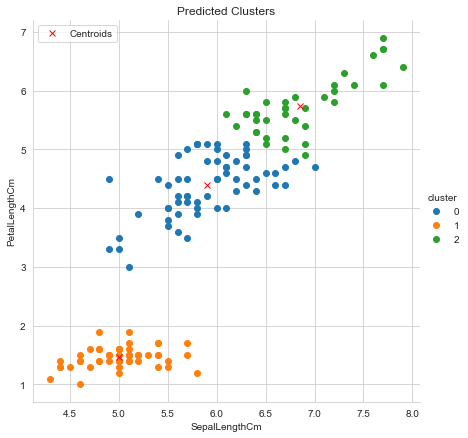

In [22]:
sns.FacetGrid(iris_df, hue='cluster',
             height=6).map(plt.scatter,
                          'SepalLengthCm',
                          'PetalLengthCm').add_legend()
plt.title('Predicted Clusters')
centers_x, centers_y=model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y,'xr');
plt.legend(['Centroids'])
plt.show()

K-means algorithm was able to classify different specifies of flowers into separate clusters

In [23]:
#Checking the goodness of the fit(Lower the interia, better the fit)
model.inertia_

78.94084142614601

Thus, optimum number of clusters is predicted and represented visually.

Thankyou!!